In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the dataset

In [7]:
data = pd.read_csv('Mroz.csv')



# Define the dependent and independent variables

In [8]:
X = data[['educ', 'exper', 'age', 'huswage', 'motheduc', 'fatheduc', 'unem']]
y = data['hours']



# Add a constant to the independent variables matrix

In [9]:
X = sm.add_constant(X)


# Fit the regression model

In [10]:
model = sm.OLS(y, X).fit()




# Display the regression results

In [11]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     27.66
Date:                Fri, 26 Sep 2025   Prob (F-statistic):           6.85e-34
Time:                        04:54:15   Log-Likelihood:                -6078.8
No. Observations:                 753   AIC:                         1.217e+04
Df Residuals:                     745   BIC:                         1.221e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        793.8972    243.537      3.260      0.0

# Get influence measures

In [12]:

influence = model.get_influence()


# Leverage values

In [13]:
leverage = influence.hat_matrix_diag

# Cook's distance

In [14]:
cooks_d, _ = influence.cooks_distance


# Define thresholds

In [15]:
n = len(data)
k = X.shape[1] - 1
lev_thresh = 2 * (k + 1) / n
cooks_thresh = 4 / n



# Identify high leverage and high Cook's distance points

In [16]:
high_lev = np.where(leverage > lev_thresh)[0]
high_cooks = np.where(cooks_d > cooks_thresh)[0]

In [17]:
print("High leverage points:", high_lev)
print("High Cook's distance points:", high_cooks)

High leverage points: [ 31  58  77  80  81 175 204 210 286 311 368 396 484 512 529 553 585 595
 597 601 609 630 643 646 649 660 671 674 679 690 697 703 727 728]
High Cook's distance points: [ 20  36  51  77  81  97 125 141 170 175 187 263 271 274 280 283 286 291
 297 307 371 390 399 402 597 613 648 679 691 703]


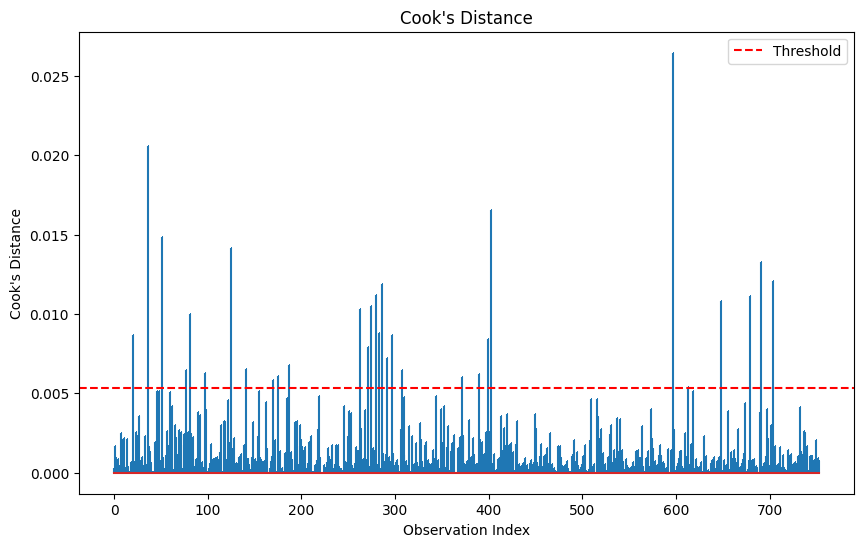

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(y=cooks_thresh, color='r', linestyle='--', label='Threshold')
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()
